In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 70.8 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=359eb87a93881f92b77d783b5c733f29954fdac92fb9041e792bfcaacf8204c8
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [2]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.7 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=6a82a3a4a0e3a573cd14ea9bce8071b57cd46ce23fd19c3e610475ee36b90211
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=e4128234276285613325339d613454e3f737a0aa63498

In [3]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.3
    Uninstalling transformers-4.27.3:
      Successfully uninstalled transformers-4.27.3


In [4]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp39-cp39-linux_x86_64.whl size=81478 sha256=7c85ab67493b9e2aea853f321e0c8d98bbd414b761aca316215c88b48d5460ff
  Stored in directory: /root/.cache/pip/wheels/a6/28/ba/284e37010e5d3aeed5e45345b58ab8683f97bdce46c9e147f9
Successfully built jellyfish


In [1]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

In [2]:
book = "Jawaharlal_Nehru_a_Biography"

In [7]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [3]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [6]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

22
1/chapter1


2023-03-25 07:50:08,812 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22


In [8]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [9]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


In [10]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'defence communications', 'jawaharlal condudedwiththesuggestion', 'agrownupperson beingendowedwith', 'prison life', 'legal practice', 'kisan sabhas', 'viceroyand churchill', 'JAWAHARLAL NEHRU', 'anxious', 'Nabha Jail', 'sentence', 'late twenties', 'representative committee', 'constitutional issue', 'notwhat was achieved', 'wasreleased thenextsummerongrounds', 'view of scoring', 'untrue or exaggerated', 'nabha administration', 'behalf of hundreds', 'jawaharlal', 'chiang', 'slave constitution', 'planters in Champaran', 'defects and mistakes', 'elections', 'jtorajendra prasad', 'jawaharlaj', 'imprisonments and regulations', 'middle classes', 'lack of viability', 'congress leadership', 'caste and wealth', 'rent and revenue', 'political conference', 'India', 'Jawaharlal', 'indian congress', 'village kisan sabhas', 'land revenue', 'tljb cabinet mission jji', 'middle class', 'autobiography jawaharlal', 'congress presidency', 'quality freeofdicheemotions', 'political agitation', 'venture to s

In [11]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) < 1960 and int(date) > 1800:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Prison_In_The’Thirties_1912': ['1/chapter1'], 'Agrownupperson_Beingendowedwith_1912': ['1/chapter1'], 'Pandit_Jawaharlal_1912': ['1/chapter1'], 'Pandit_Jawaharlal_1931': ['1/chapter11'], 'Pandit_Jawaharlal_1933': ['1/chapter12'], 'Pandit_Jawaharlal_1936': ['1/chapter13'], 'Literature_And_Developed_1912': ['1/chapter1'], 'Motilal_Nehru_1912': ['1/chapter1'], 'Motilal_Nehru_1917': ['1/chapter2'], 'Motilal_Nehru_1930': ['1/chapter10'], 'Autobiography_Jawaharlal_1912': ['1/chapter1'], 'Confined_Tohisletterstohisfather_1912': ['1/chapter1'], 'Jawaharlal_Nehru_1923': ['1/chapter7'], 'Jawaharlal_Nehru_1929': ['1/chapter9'], 'Jawaharlal_Nehru_1936': ['1/chapter13'], 'Jawaharlal_Nehru_1947': ['1/chapter22'], 'Public_School_1912': ['1/chapter1'], 'Jawaharial_Nehru_1912': ['1/chapter1'], 'Talukdars_And_Links_1912': ['1/chapter1'], 'Forthematterofthat_Agrownupperson_1912': ['1/chapter1'], 'Poetry_And_Literature_1912': ['1/chapter1'], 'University_1912': ['1/chapter1'],

In [12]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [13]:
key_yr_chap_mp

defaultdict(list,
            {'Prison_In_The’Thirties_1912': ['1/chapter1'],
             'Agrownupperson_Beingendowedwith_1912': ['1/chapter1'],
             'Pandit_Jawaharlal_1912': ['1/chapter1'],
             'Pandit_Jawaharlal_1931': ['1/chapter11'],
             'Pandit_Jawaharlal_1933': ['1/chapter12'],
             'Pandit_Jawaharlal_1936': ['1/chapter13'],
             'Literature_And_Developed_1912': ['1/chapter1'],
             'Motilal_Nehru_1912': ['1/chapter1'],
             'Motilal_Nehru_1917': ['1/chapter2'],
             'Motilal_Nehru_1930': ['1/chapter10'],
             'Autobiography_Jawaharlal_1912': ['1/chapter1'],
             'Confined_Tohisletterstohisfather_1912': ['1/chapter1'],
             'Jawaharlal_Nehru_1923': ['1/chapter7'],
             'Jawaharlal_Nehru_1929': ['1/chapter9'],
             'Jawaharlal_Nehru_1936': ['1/chapter13'],
             'Jawaharlal_Nehru_1947': ['1/chapter22'],
             'Public_School_1912': ['1/chapter1'],
             

In [14]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Prison_In_The’Thirties_1912
Agrownupperson_Beingendowedwith_1912
Pandit_Jawaharlal_1912
Pandit_Jawaharlal_1931
Pandit_Jawaharlal_1933
Pandit_Jawaharlal_1936
Literature_And_Developed_1912
Motilal_Nehru_1912
Motilal_Nehru_1917
Motilal_Nehru_1930
Autobiography_Jawaharlal_1912
Confined_Tohisletterstohisfather_1912
Jawaharlal_Nehru_1923
Jawaharlal_Nehru_1929
Jawaharlal_Nehru_1936
Jawaharlal_Nehru_1947
Public_School_1912
Jawaharial_Nehru_1912
Talukdars_And_Links_1912
Forthematterofthat_Agrownupperson_1912
Poetry_And_Literature_1912
University_1912
Zamindars_And_Talukdars_1912
Middle_Class_1917
Home_Rule_1917
Engagement_1917
Mrs_Besant_1917
Joint_Secretaries_1917
Late_Twenties_1917
Pandit_Motilal_Nehru_1917
Motilal_Nehru_Papers_1917
Representative_Committee_1917
Motilal_1917
Tions_To_Proceed_1917
Jawaharlal_1917
Jawaharlal_1920
Jawaharlal_1921
Jawaharlal_1923
Jawaharlal_1929
Jawaharlal_1931
Jawaharlal_1936
Jawaharlal_1946
Jawaharlal_1947
Rao_Maharajsingh_1917
Renunciation_1920
Legal_Practice_

In [15]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [16]:
url = 'https://en.wikipedia.org/wiki/Jawaharlal_Nehru'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life_and_career_(1889–1912)', 'Birth_and_family_background', 'Childhood', 'Youth', 'Graduation', 'Advocate_practice', 'Nationalist_movement_(1912–1938)', 'Britain_and_return_to_India:_1912–1913', 'World_War_I:_1914–1915', 'Home_rule_movement:_1916–1917', 'Non-co-operation:_1920–1927', 'Internationalising_the_struggle_for_Indian_independence:_1927', 'Fundamental_Rights_and_Economic_Policy:_1929', 'Declaration_of_independence', 'Salt_March:_1930', 'Salt_satyagraha_success', 'Electoral_politics,_Europe,_and_economics:_1936–1938', 'Nationalist_movement_(1939–1947)', 'Civil_disobedience,_Lahore_Resolution,_August_Offer:_1940', "Japan_attacks_India,_Cripps'_mission,_Quit_India:_1942", 'In_prison_1943–1945', 'Cabinet_mission,_Interim_government_1946–1947', 'Prime_Minister_of_India_(1947–1964)', 'Republicanism', 'Independence,_Dominion_of_India:_1947–1950', 'Independence', 'Assassination_of_Mahatma_Gandhi:_1948', 'Integration_of_states_and_Adoption_of_New_Constitution:_1947–1950', 'Ele

In [17]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' or val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [18]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [19]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

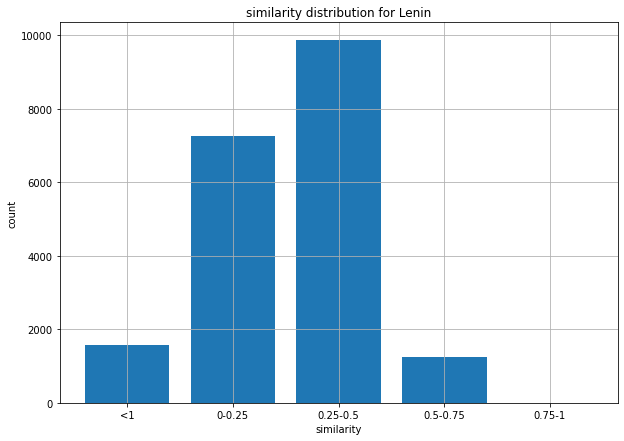

In [20]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<1"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


display_bar_plot(mp_sim_score_bar_range,"similarity distribution for Lenin","similarity","count")

In [21]:
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) < 1960 and int(date) > 1800:                    
                #print date
                year_list.append(date)
    except:
        pass
    if year_list:
        res = max(set(year_list), key=year_list.count)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
    

    
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = 170
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
#         print(f"{date_score}    {sim_score}")
        mixed_sim_score[key] = date_score*sim_score
    
maxval = max(mixed_sim_score.values())
for k,v in mixed_sim_score.items():
    mixed_sim_score[k] = v/maxval
    
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    #if v>= 0.35:
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))
    
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in section_wise_keyword_filtered.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")

Birth_and_family_background  ->   ['Jawaharlal_1920', 'Satyagraha_1920', 'Motilal_Nehru_Papers_1917', 'Political_Agitation_1920', 'Satyagraha_Vow_1920']
Childhood  ->   ['Gandhi_1927', 'Autobiography_Jawaharlal_1912', 'Jawaharial_Nehru_1912', 'Motilal_Nehru_1912', 'Gandhiji_1940']
Youth  ->   ['Autobiography_Jawaharlal_1912', 'Motilal_Nehru_1912', 'Jawaharial_Nehru_1912', 'Pandit_Jawaharlal_1912', 'Public_School_1912']
Graduation  ->   ['Public_School_1912', 'Jawaharial_Nehru_1912', 'Motilal_Nehru_1912', 'Autobiography_Jawaharlal_1912', 'Zamindars_And_Talukdars_1912']
Advocate_practice  ->   ['Motilal_Nehru_1912', 'Jawaharial_Nehru_1912', 'Zamindars_And_Talukdars_1912', 'Pandit_Jawaharlal_1912', 'Autobiography_Jawaharlal_1912']
Britain_and_return_to_India:_1912–1913  ->   ['Jawaharial_Nehru_1912', 'Motilal_Nehru_1912', 'Zamindars_And_Talukdars_1912', 'Autobiography_Jawaharlal_1912', 'Pandit_Jawaharlal_1912']
World_War_I:_1914–1915  ->   ['Motilal_Nehru_Papers_1917', 'Pandit_Motilal_Neh

In [22]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Agrarian_Crisis', 'Hastening_To_Wardha', 'India_Affairs', 'Jawaharlaj', 'Kisan_Sabha_Movement', 'Deathof_Kamaia_Nehru', 'Kamala_Nehru', 'Example_Gandhi', 'Anti_Imperialist', 'India', 'Jawaharlal', 'Caste_And_Wealth', 'Gandhi_Smarak_Sangrahalaya', 'Jawaharlats_Interviews', 'Satyagraha', 'Continue', 'Gandhian', 'Return_Jawaharlal', 'Tljb_Cabinet_Mission_Jji', 'Gandhi', 'Chiang', 'Political_Agitation', 'Presidential_Address', 'Kamala', 'Boundary_Commissions', 'Colonial_Countries', 'Nehru', 'Motilal', 'Time,Was_The_Conductof', 'Congress', 'Pandit_Jawaharlal', 'Village_Kisan_Sabhas', 'Mao', 'Indian_History_Congress', 'Egregiously_To_Minister', 'Viceroyand_Churchill', 'Satyagraha_Vow', 'Nationalist_Movements', 'Tomadame_Chiang_Kai', 'Motilal_Nehru_Papers', 'Indian_Government', 'Decide', 'Jawaharlat_Nehru', 'Individual_Civil', 'Viceroyalty', 'Asfor_Pandit_Jawaharlal', 'Muslim_League', 'Bombay_Jawaharlal', 'Viceroy', 'Imperialism', 'Exploitation', 'Motilal_Nehru', 'Civil_Disobedience', 'Bomb

In [23]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)

3167
{'Vedaranyam_March', 'Ethical_socialism', 'Indian_National_Trade_Union_Congress', 'Erich_Fromm', 'Template:Ministry_of_Finance_(India)', 'Narcotics_Control_Bureau', 'Social_democracy_in_the_United_States', 'Gandhi%E2%80%93Nehru_family', 'George_Allen_and_Unwin', 'Pherozeshah_Mehta', 'First_Indian_National_Army', 'Category:Articles_with_NARA_identifiers', 'Anglo-Mysore_Wars', 'Evo_Morales', 'George_Robinson,_1st_Marquess_of_Ripon', 'Meredith_Townsend', 'Ramakrishna_Hegde', 'Second_Nehru_ministry', 'Japanese_occupation_of_Burma', 'John_Searle', 'Elizabeth_II', 'Theodore_Beza', 'Divine_right_of_kings', 'Khilafat_Movement', 'Francis_Fukuyama', 'Battle_of_Meiktila_and_Mandalay', 'Karl_Liebknecht', 'Sheikh_Abdullah', 'ThePrint', 'Godesberg_Program', 'Ab_Dilli_Dur_Nahin', 'Himachal_Pradesh_Congress_Committee', '7th_Central_Pay_Commission_(CPC)_and_Defence_Forces', 'AIIMS', 'Bhagat_Singh', 'Kotla_Vijay_Bhaskar_Reddy', '1937_Indian_provincial_elections', 'Princely_state', 'Gopinath_Bordolo

In [24]:
hyperlinks_present = final_keywords & urls
print(hyperlinks_present)
len(hyperlinks_present)

{'Imperialism', 'Viceroy', 'Kamala_Nehru', 'Satyagraha', 'India', 'Motilal_Nehru'}


6

In [25]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Village_Panchayats_1921', 'Pandit_Nehru_1946', 'Motilal_Nehru_1912', 'Rao_Maharajsingh_1917', 'Mao_1940', 'Kisan_Sabha_Movement_1921', 'Village_Kisan_Sabhas_1921', 'Tomadame_Chiang_Kai_1940', 'Hastening_To_Wardha_1940', 'Mahatma_1927', 'India_Affairs_1921', 'Continue_1947', 'Jawaharlal_1946', 'Kamala_Nehru_1936', 'Deathof_Kamaia_Nehru_1936', 'Gandhi_1930', 'Caste_And_Wealth_1929', 'Viceroyand_Churchill_1942', 'Motilal_Nehru_Papers_1917', 'Jawaharial_Nehru_1912', 'Anti_Imperialist_1936', 'Defence_Responsibilities_1942', 'Nehru_1942', 'Viceroyalty_1947', 'Civil_Disobedience_1929', 'Muslim_League_1946', 'Autobiography_Jawaharlal_1912', 'Jawaharlal_1947', 'Viceroy_1942', 'Gandhian_1921', 'Example_Gandhi_1946', 'Gandhi_1927', 'Operation_Movement_1921', 'Bombay_Jawaharlal_1946', 'Civil_Disobedience_1940', 'Viceroy_1947', 'Exploitation_1927', 'Satyagraha_1920', 'Jawaharlal_Nehru_1929', 'Chiang_1940', 'Satyagraha_Vow_1920', 'Pandit_Jawaharlal_1912', 'Jawaharlal_1920', 'Jawaharlal_Nehru_1947'

In [26]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Pandit_Jawaharlal_1912': ['1/chapter1'], 'Pandit_Jawaharlal_1931': ['1/chapter11'], 'Pandit_Jawaharlal_1936': ['1/chapter13'], 'Motilal_Nehru_1912': ['1/chapter1'], 'Motilal_Nehru_1917': ['1/chapter2'], 'Motilal_Nehru_1930': ['1/chapter10'], 'Autobiography_Jawaharlal_1912': ['1/chapter1'], 'Jawaharlal_Nehru_1923': ['1/chapter7'], 'Jawaharlal_Nehru_1929': ['1/chapter9'], 'Jawaharlal_Nehru_1947': ['1/chapter22'], 'Public_School_1912': ['1/chapter1'], 'Jawaharial_Nehru_1912': ['1/chapter1'], 'Zamindars_And_Talukdars_1912': ['1/chapter1'], 'Pandit_Motilal_Nehru_1917': ['1/chapter2'], 'Motilal_Nehru_Papers_1917': ['1/chapter2'], 'Motilal_1917': ['1/chapter2'], 'Jawaharlal_1920': ['1/chapter3'], 'Jawaharlal_1929': ['1/chapter9'], 'Jawaharlal_1946': ['1/chapter19', '1/chapter21'], 'Jawaharlal_1947': ['1/chapter22'], 'Rao_Maharajsingh_1917': ['1/chapter2'], 'Satyagraha_1920': ['1/chapter3'], 'Political_Agitation_1920': ['1/chapter3'], 'Egregiously_To_Minister_1920': ['1/chapter3'], 'Satyagra

In [27]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['village panchayats', 'pandit nehru', 'motilal nehru', 'rao maharajsingh', 'mao', 'kisan sabha movement', 'village kisan sabhas', 'tomadame chiang kai', 'hastening to wardha', 'mahatma', 'india affairs', 'continue', 'jawaharlal', 'kamala nehru', 'deathof kamaia nehru', 'gandhi', 'caste and wealth', 'viceroyand churchill', 'motilal nehru papers', 'jawaharial nehru', 'anti imperialist', 'defence responsibilities', 'nehru', 'viceroyalty', 'civil disobedience', 'muslim league', 'autobiography jawaharlal', 'jawaharlal', 'viceroy', 'gandhian', 'example gandhi', 'gandhi', 'operation movement', 'bombay jawaharlal', 'civil disobedience', 'viceroy', 'exploitation', 'satyagraha', 'jawaharlal nehru', 'chiang', 'satyagraha vow', 'pandit jawaharlal', 'jawaharlal', 'jawaharlal nehru', 'gandhi', 'gandhi smarak sangrahalaya', 'nationalist movements', 'presidential address', 'decide', 'agrarian crisis', 'facts aboutkamels nehru', 'public school', 'civil disobedience', 'motilal', 'jawaharlats interviews

In [28]:
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

22
97
0.2268041237113402
